# OPPENHEIMER MOVIE- SENTIMENT ANALYSIS

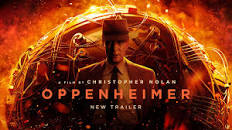

In [66]:
!pip install textblob
import numpy as np
import pandas as pd 
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
url = "C:\\Users\\admin\\Desktop\\Oppenhimer_Cleaned_Reviews.csv"
df = pd.read_csv(url, delimiter=',', header=0)  # Replace delimiter with your actual delimiter
df

,text,rating
0,"A challenging watch to be sure, but a worthwhi...",8
1,A brilliantly layered examination of a man thr...,1
2,Nolan delivers a powerfull biopic that shows t...,1
3,A Masterpiecemohameddawoud-2601919 July 2023I ...,1
4,And the Oscar goes to...mark-217-30703319 July...,1
...,...,...
84043,"Huge story, but production fails sometimesandr...",7
84044,Tweakedfmacr25 July 2023I suppose these review...,6
84045,Just a 6 for a near perfect film.m-nicolaou-86...,6
84046,No need to be 3 hoursscottahaynie24 July 2023A...,6


In [22]:
rows, cols = df.shape
print(f"There are {rows} and {cols} columns in dataset")

There are 84048 and 2 columns in dataset


In [25]:
print(f"There are {df.duplicated().sum()} duplicate values")
df = df.drop_duplicates()

There are 82012 duplicate values


In [24]:
for i in range(len(df['text'])):
     df['text'][i]= re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",df['text'][i])
df['text'][0]

'A challenging watch to be sure but a worthwhile oneJeremyUrquhart20 July 2023One of the most anticipated films of the year for many people myself included Oppenheimer largely delivers Much of its great I feel like I loved two of its three hours and liked the other hour but its that fact that stops me from adoring the entire thing I know with Christopher Nolans Dunkirk that clicked on a second watch so maybe Oppenheimer will need one too That being said I dont feel the need to rush out and see it again too soon because it was a long and exhausting filmBut in many ways I cant deny it was an exceptionally well made one It looks and sounds as amazing as youd expect feeling as though it accurately captures the time period its set in and containing amazing sound design and one of the years best scores so far Every performance is good to great but the film belongs to Cillian Murphy and I feel like hes the lead actor to beat at this stage if were talking early awards considerationThe films at

In [26]:
print(f"There are {df.duplicated().sum()} duplicate values")

There are 0 duplicate values


In [27]:
df.describe().transpose()

,count,unique,top,freq
text,2036,2036,A challenging watch to be sure but a worthwhil...,1
rating,2036,21,1,981


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 84047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2036 non-null   object
 1   rating  2036 non-null   object
dtypes: object(2)
memory usage: 47.7+ KB


In [29]:
df.isna().sum()

text      0
rating    0
dtype: int64

In [30]:
def analyze(x):
        if(x>=0.5):
            return "Postive"
        elif x<=-0.5:
            return "Negative"
        else:
            return "Neutral"

In [31]:
def score(x):
        blob = TextBlob(x)
        return blob.sentiment.polarity

In [32]:
df['score']=df['text'].apply(score)
df['analysis']=df['score'].apply(analyze)
df.head()

,text,rating,score,analysis
0,A challenging watch to be sure but a worthwhil...,8,0.267934,Neutral
1,A brilliantly layered examination of a man thr...,1,0.173837,Neutral
2,Nolan delivers a powerfull biopic that shows t...,1,0.273182,Neutral
3,A Masterpiecemohameddawoud2601919 July 2023I m...,1,0.234615,Neutral
4,And the Oscar goes tomark21730703319 July 2023...,1,0.225556,Neutral


In [33]:
df['analysis'].unique()

array(['Neutral', 'Postive', 'Negative'], dtype=object)

In [34]:
df["rating"].value_counts()

1    981
9    320
8    184
7    177
6    142
5     67
3     57
4     53
2     34
A      4
O      3
T      3
M      2
G      2
C      1
D      1
E      1
I      1
S      1
B      1
J      1
Name: rating, dtype: int64

In [35]:
df.drop(df[(df['rating'] == 'A')].index, inplace=True)
df.drop(df[(df['rating'] == 'O')].index, inplace=True)
df.drop(df[(df['rating'] == 'T')].index, inplace=True)
df.drop(df[(df['rating'] == 'M')].index, inplace=True)
df.drop(df[(df['rating'] == 'G')].index, inplace=True)
df.drop(df[(df['rating'] == 'C')].index, inplace=True)
df.drop(df[(df['rating'] == 'D')].index, inplace=True)
df.drop(df[(df['rating'] == 'E')].index, inplace=True)
df.drop(df[(df['rating'] == 'I')].index, inplace=True)
df.drop(df[(df['rating'] == 'S')].index, inplace=True)
df.drop(df[(df['rating'] == 'B')].index, inplace=True)
df.drop(df[(df['rating'] == 'J')].index, inplace=True)

In [36]:
df["rating"].value_counts()

1    981
9    320
8    184
7    177
6    142
5     67
3     57
4     53
2     34
Name: rating, dtype: int64

<BarContainer object of 2015 artists>

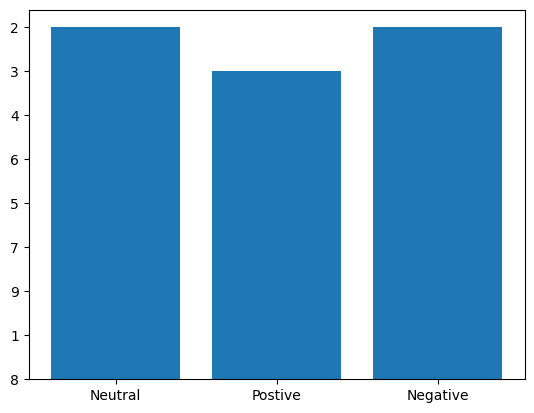

In [37]:
plt.bar(df['analysis'],df['rating'])

In [38]:
df.describe()

,score
count,2015.000000
mean,0.196530
std,0.210643
min,-1.000000
25%,0.075093
50%,0.197892
75%,0.295994
max,1.000000


In [39]:
df.describe(include='object')

,text,rating,analysis
count,2015,2015,2015
unique,2015,9,3
top,A challenging watch to be sure but a worthwhil...,1,Neutral
freq,1,981,1880


In [40]:
def rating(x):
    if x>=8 and x<=10:
        return 'Positive'
    elif x>=4 and x<=7:
         return 'Neutal'
    else:
         return 'Negative'

In [41]:
df['rating'] = df['rating'].astype(int)

In [42]:
df['rating_analysis']=df['rating'].apply(rating)
df['rating'].dtypes

dtype('int32')

In [43]:
df.reset_index(inplace = True,drop=True)
df['final_rating'] = 'Postive'
df.head(25)

,text,rating,score,analysis,rating_analysis,final_rating
0,A challenging watch to be sure but a worthwhil...,8,0.267934,Neutral,Positive,Postive
1,A brilliantly layered examination of a man thr...,1,0.173837,Neutral,Negative,Postive
2,Nolan delivers a powerfull biopic that shows t...,1,0.273182,Neutral,Negative,Postive
3,A Masterpiecemohameddawoud2601919 July 2023I m...,1,0.234615,Neutral,Negative,Postive
4,And the Oscar goes tomark21730703319 July 2023...,1,0.225556,Neutral,Negative,Postive
5,Another Cinematic Masterpiece by Christopher N...,1,0.152216,Neutral,Negative,Postive
6,This movie is the bombzeki420 July 2023Master ...,8,0.294841,Neutral,Positive,Postive
7,Exceptional storytelling and Genius Cinametogr...,9,0.289333,Neutral,Positive,Postive
8,FUTURE CLASSIC and EXTREMELY IMPORTANT MOVIE F...,1,0.248889,Neutral,Negative,Postive
9,Is it just me pdean4913221 July 2023Is it just...,8,0.109792,Neutral,Positive,Postive


In [44]:
for i in range(len(df)):
    if (df['analysis'][i]=='Positive' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Positive'
        
    elif (df['analysis'][i] == 'Positive' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Postive'
        
    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Neutral'
        
    elif (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Neutral'):
        df['final_rating'][i] = 'Neutral'
   
    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Negative'
        
    else:
        df['final_rating'][i] = 'Neutral'

In [45]:
df.head(27)

,text,rating,score,analysis,rating_analysis,final_rating
0,A challenging watch to be sure but a worthwhil...,8,0.267934,Neutral,Positive,Postive
1,A brilliantly layered examination of a man thr...,1,0.173837,Neutral,Negative,Neutral
2,Nolan delivers a powerfull biopic that shows t...,1,0.273182,Neutral,Negative,Neutral
3,A Masterpiecemohameddawoud2601919 July 2023I m...,1,0.234615,Neutral,Negative,Neutral
4,And the Oscar goes tomark21730703319 July 2023...,1,0.225556,Neutral,Negative,Neutral
5,Another Cinematic Masterpiece by Christopher N...,1,0.152216,Neutral,Negative,Neutral
6,This movie is the bombzeki420 July 2023Master ...,8,0.294841,Neutral,Positive,Postive
7,Exceptional storytelling and Genius Cinametogr...,9,0.289333,Neutral,Positive,Postive
8,FUTURE CLASSIC and EXTREMELY IMPORTANT MOVIE F...,1,0.248889,Neutral,Negative,Neutral
9,Is it just me pdean4913221 July 2023Is it just...,8,0.109792,Neutral,Positive,Postive


In [46]:
df['final_rating'].unique()

array(['Postive', 'Neutral', 'Negative'], dtype=object)

<Axes: xlabel='final_rating', ylabel='count'>

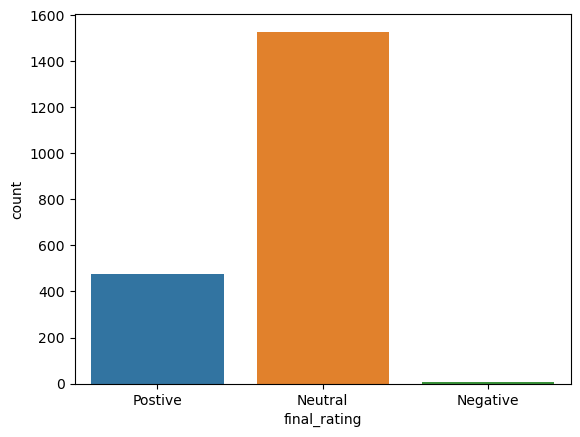

In [47]:
sns.countplot(x='final_rating',data =df)

# Oppenheimer has very less negative reviews